## Final Project Submission

Please fill out:
* Student name: Kelvin Waters
* Student pace: online-ds-ft-012120
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


### Objective
This project entails utilizing the kc_house_data set to predict housing prices making use of a multivariate linear regression model. The initial dataset consists well over twenty-thousand rows spanding twenty-one columns at approx: 3.5MB. The price is the dependant variable and is the targeted prediction in this notebook, the features are the independent variables. The columns and descriptions in the dataset are as follows:
* id - a notation for a house
* date - date house was sold
* price - price is prediction target
* bedrooms - number of bedrooms/house
* bathrooms - number of bathrooms/house
* sqft_living - square footage of the home
* sqft_loft - square footage of the lot
* floors - total floors (levels) in the house
* waterfront - house which has a view to a waterfront
* view - has been viewed
* condition - how good the condition is overall(1-5 scale, 5 being excellent)
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of the house apart from the basement
* sqft_basement - square footage of the basement
* yr_built - year house was constructed

Exploratory data analysis (EDA) questions addressed in this notebook are as follows:
1. *What independant variables are being considered categorical and why?*
2. *How and which dtypes values are being prepped for modeling?*
3. *Which, if any, independant variables were considered highly correlated and how was it handled?*

> This notebook will be following the **OSEMIN** processing model and is documented accordingly

<img src="images/new_osemn.png" width=600>

Coefficient findings and answers
1. *Coefficient Y of the model...*
2. *Coefficient B1 ...*
3. *Coefficient  e ...*

In [42]:
import numpy as np
import pandas as pd 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import calendar

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm
import scipy.stats as stats


import pandas.util.testing as tm

import warnings
warnings.filterwarnings('ignore')

### Obtain
Initial loading of the data set

In [43]:
# importing the data set 
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Taking note of the original shape of the data set

In [44]:
data.shape

(21597, 21)

Basic info of the columns and data types

### Scrub & Clean

In [45]:
# taking note of the various data types
# object types date, yr_renovated may be changed to date_time dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Simple glance and values of each column

In [46]:
# viewing each column as a str object 
for col in data.columns:
    try:
        print(col, data[col].value_counts()[:5])
    except:
        print(col, data[col].value_counts())
        
    print('\n') 

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Checking correlation of the data set

In [47]:
# basic correl values duplicated use of heatmap more appropriate
data.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Checking for multicollinearity via masked heatmap

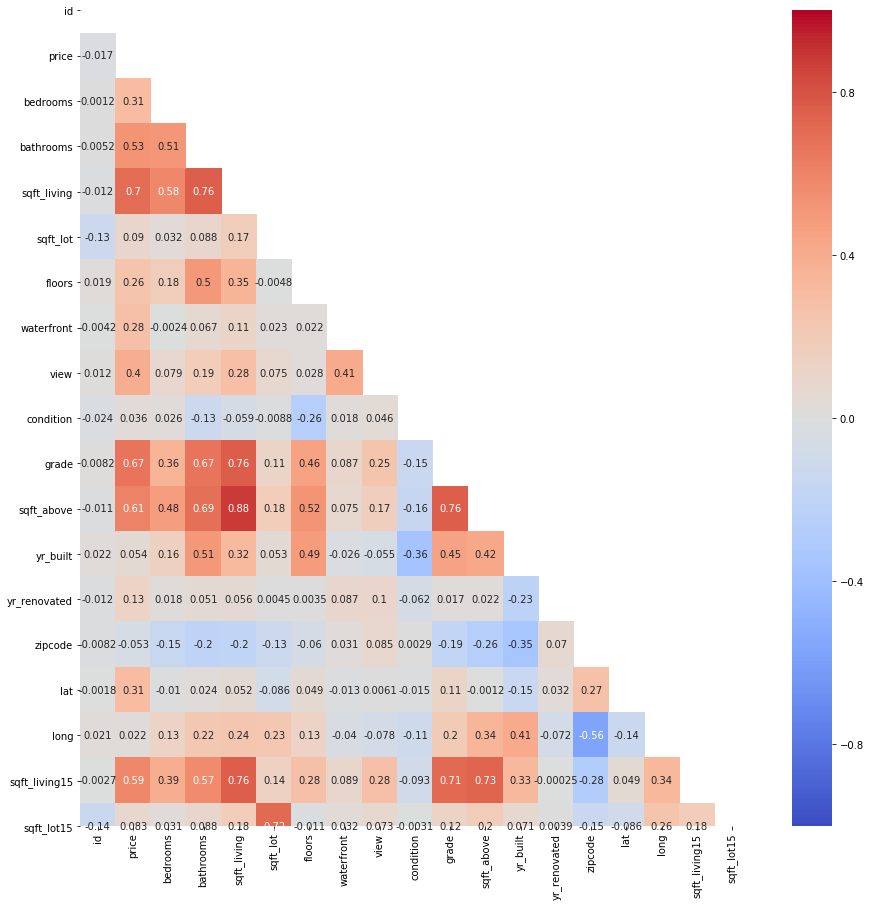

In [48]:
# correlation map without the duplicated data via mask
# look good the sqft_above indicates a correlation with an indentical variable
# sqft_living
corr = data.corr()

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True, mask = mask);

Normalizing data (scaling values)

Converting calendar events to_datetime object

In [49]:
# date, yr_renovated, yr_built
data['date'] = pd.to_datetime(data['date'])
data['yr_renovated'] = pd.to_datetime(data['yr_renovated'])
data['yr_built'] = pd.to_datetime(data['yr_built'])

In [50]:
# sqft_basement to categorical yes -1 , no - 0
# having a 'finished' basement will influence the target model price
# this data set doesn't differiate if the basement is considered a finished basement, like a home movie theatre/ gameroom
# the majority (> 12k) of values is listed as 0.0, assuming no basement another 454 values have '?'
data['sqft_basement'] = data['sqft_basement'].replace('?', '0')
data['sqft_basement'] = data['sqft_basement'].astype(float)

Changing view, waterfront, sqft_basement to "has features". Any value > 0 is changed to a 1. So this can be viewed as a has view? Has basement? Is waterfront? 

In [51]:
# views to binary
data.view.values[data['view'].values > 0] = 1
# sqft_basement to binary
data.sqft_basement.values[data['sqft_basement'].values > 0] = 1
# waterfront to binary
data.waterfront.values[data['waterfront'].values > 0] = 1

In [52]:
data.view.value_counts()

0.0    19422
1.0     2112
Name: view, dtype: int64

In [53]:
data.sqft_basement.value_counts()

0.0    13280
1.0     8317
Name: sqft_basement, dtype: int64

In [54]:
data.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Checking for missing values

In [55]:
# waterfront has 11% missing
# view < 1%
# yr_renovated 18% missing values
data.isna().mean().round(4)* 100

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

Consequences of dropna()

In [56]:
# dropping NaN's axis= 1 col would remove to columns
# dropping NaN's axis= 0 rows would lose more than half of the dataframe! 
drop_nans = data.dropna(axis= 0)
display(data.shape) # original shape
drop_nans.shape # dropna utilized shape

(21597, 21)

(15762, 21)

> Below grade spaces (basements, dens, etc.) do not usually count toward a home's square footage. 
> Even a finished basement can't be counted toward a home's Gross Living Area (GLA) but it can be noted 
> separately in the listings total area. ... Stairways and closet areas are included in the square footage length.

<img src="images/redfin.png">
%%html
<a href="https://www.redfin.com/blog/how-to-calculate-the-square-footage-of-your-home/">How to calculate the sqft of your home</a>

In [57]:
# adding a price_per_sqft column
# popular real estate metric which I can utilize in presentation
data['price_per_sqft'] = data['price'] / data['sqft_living']
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,1.0,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1970-01-01 00:00:00.000001933,NaT,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,1.0,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,1970-01-01 00:00:00.000002009,1970-01-01 00:00:00.000000000,98103,47.6993,-122.346,1530,1509,235.294118
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,1970-01-01 00:00:00.000002014,1970-01-01 00:00:00.000000000,98146,47.5107,-122.362,1830,7200,173.160173
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,1970-01-01 00:00:00.000002009,1970-01-01 00:00:00.000000000,98144,47.5944,-122.299,1020,2007,394.216667
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,1970-01-01 00:00:00.000002004,1970-01-01 00:00:00.000000000,98027,47.5345,-122.069,1410,1287,250.000000


Striping space from data.columns

In [58]:
data.columns = data.columns.str.strip()

Dropping columns that I'm assuming has little to no affect on target variable price

In [59]:
# how many times a property was viewed would'nt affect target
# the lat and long of a dwelling wouldn't affect the target, properties in prominent zipcodes are often sought
# sqft_living15 and sqft_lot15 wouldn't affect target
# sqft_above are indentical values to sqft_living the "above grade living area"
# excluding date for the time being from model consideration
data_scrub = data.drop(['id', 'lat', 'long', 'date', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis= 'columns')
data_scrub.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,0.0,1970-01-01 00:00:00.000001955,1970-01-01 00:00:00.000000000,98178,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1.0,1970-01-01 00:00:00.000001951,1970-01-01 00:00:00.000001991,98125,209.338521
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1970-01-01 00:00:00.000001933,NaT,98028,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1.0,1970-01-01 00:00:00.000001965,1970-01-01 00:00:00.000000000,98136,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,1970-01-01 00:00:00.000001987,1970-01-01 00:00:00.000000000,98074,303.571429


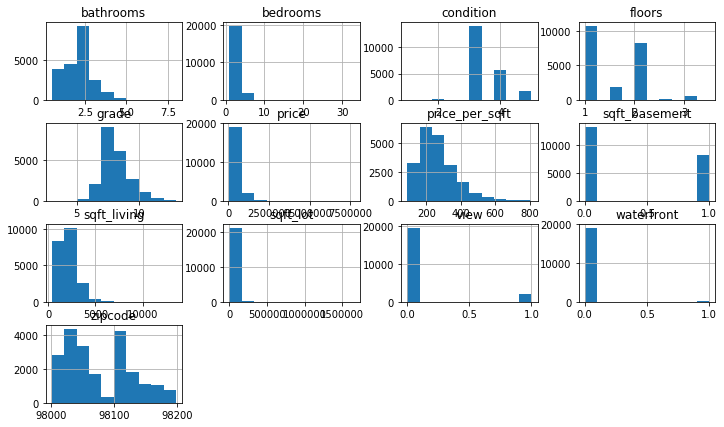

<Figure size 864x864 with 0 Axes>

In [96]:
data_scrub.hist()
plt.figure(figsize=(12,12))
plt.show()

In [61]:
data_scrub.price_per_sqft.describe()

count    21597.000000
mean       264.143368
std        110.000061
min         87.588235
25%        182.291667
50%        244.644550
75%        318.333333
max        810.138889
Name: price_per_sqft, dtype: float64

Data being transfered via one-hot encoding to cat data

In [62]:
# 33 bedrooms! 
data_scrub.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [63]:
# potential outliars 33 bedrooms and 1.75 baths in a 1620sqft living space sounds implausible
data_scrub[data_scrub.bedrooms > 9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft
8748,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,1.0,1970-01-01 00:00:00.000001918,1970-01-01 00:00:00.000001999,98106,173.333333
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,1.0,3,9,1.0,1970-01-01 00:00:00.000002008,1970-01-01 00:00:00.000000000,98004,250.544662
15147,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,7,1.0,1970-01-01 00:00:00.000001958,1970-01-01 00:00:00.000000000,98006,180.055402
15856,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1.0,1970-01-01 00:00:00.000001947,1970-01-01 00:00:00.000000000,98103,395.061728
19239,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1.0,1970-01-01 00:00:00.000001913,1970-01-01 00:00:00.000000000,98105,226.027397


In [64]:
data_scrub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'price_per_sqft'],
      dtype='object')

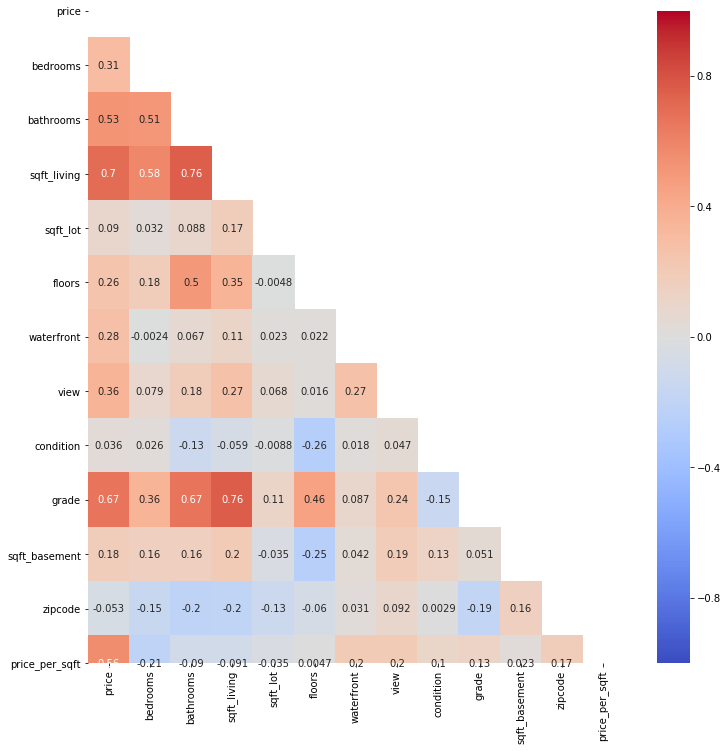

In [65]:
corr = data_scrub.corr()

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True, mask = mask);

### Explore

Concern that outliers could exist here, like a 2BR price comparision of a larger 3BR for the same general area, although this would not be unheard of. 

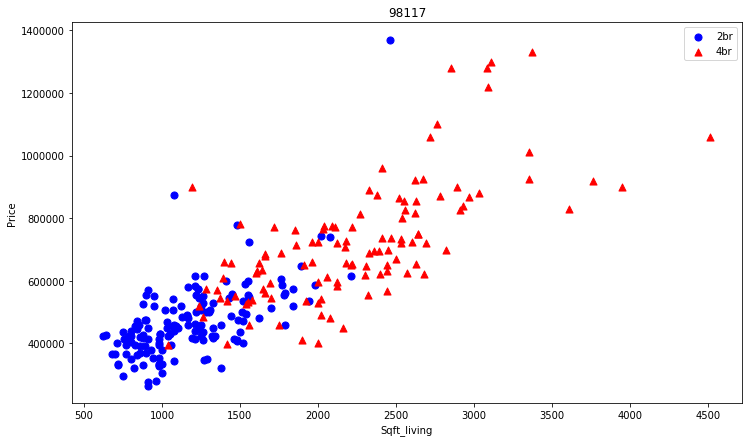

In [66]:
# comparing price between home size 
# some outliers indicate that some 2br dwellings are more expensive than 5br's in the same zipcode and sqft. 

def scatter(df, zipcode):
    bed_a = data_scrub[(data.zipcode == zipcode) & (data.bedrooms == 2)] 
    bed_b = data_scrub[(data.zipcode == zipcode) & (data.bedrooms == 4)]
    
    plt.rcParams['figure.figsize'] = (12,7)
    plt.scatter(bed_a.sqft_living, bed_a.price, color = 'b', label = '2br', s= 50)
    plt.scatter(bed_b.sqft_living, bed_b.price, marker= '^', color = 'r', label = '4br', s= 50)

    plt.xlabel('Sqft_living')
    plt.ylabel('Price')
    plt.title(zipcode)
    plt.legend()

scatter(data, 98117)

In [67]:
# property count by zip codes
zipcode_stats = data.groupby('zipcode')['zipcode'].agg('count').sort_values(ascending= False)
zipcode_stats

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Text(0, 0.5, 'count')

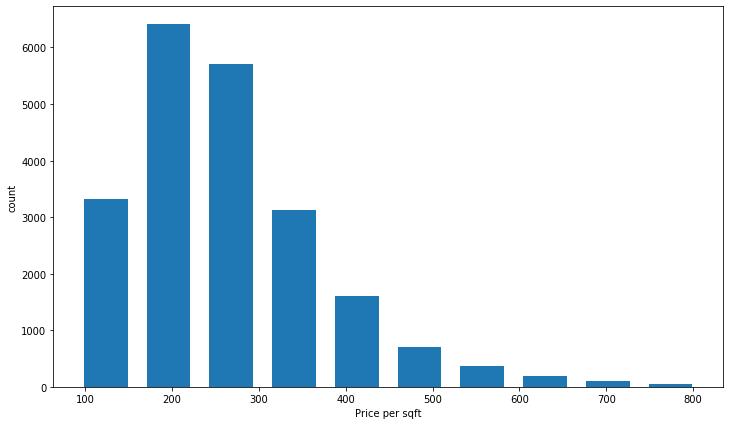

In [68]:
plt.figure(figsize=(12,7))
plt.hist(data.price_per_sqft, rwidth=0.7)
plt.xlabel('Price per sqft')
plt.ylabel('count')

Changing zipcode to categorical type as a location

In [69]:
# assigning these value into a dataframe obj
# all 70 values are now columns
dummies = pd.get_dummies(data_scrub.zipcode)

In [70]:
# on axis = 1 columns
# minus 1 dummy 98199
model_concat_dummies  = pd.concat([data_scrub, dummies.drop(98199, axis= 1)], axis= 1)

In [71]:
model_concat_dummies.columns

Index([         'price',       'bedrooms',      'bathrooms',    'sqft_living',
             'sqft_lot',         'floors',     'waterfront',           'view',
            'condition',          'grade',  'sqft_basement',       'yr_built',
         'yr_renovated',        'zipcode', 'price_per_sqft',            98001,
                  98002,            98003,            98004,            98005,
                  98006,            98007,            98008,            98010,
                  98011,            98014,            98019,            98022,
                  98023,            98024,            98027,            98028,
                  98029,            98030,            98031,            98032,
                  98033,            98034,            98038,            98039,
                  98040,            98042,            98045,            98052,
                  98053,            98055,            98056,            98058,
                  98059,            98065,          

In [72]:
# ok now that zipcode has been change via get_dummies we can drop the feature as well as the 
# price_per_sqft that was used to chase outliers
model_concat_dummies_drop = model_concat_dummies.drop('zipcode', axis= 1)

In [73]:
model_concat_dummies_drop.columns

Index([         'price',       'bedrooms',      'bathrooms',    'sqft_living',
             'sqft_lot',         'floors',     'waterfront',           'view',
            'condition',          'grade',  'sqft_basement',       'yr_built',
         'yr_renovated', 'price_per_sqft',            98001,            98002,
                  98003,            98004,            98005,            98006,
                  98007,            98008,            98010,            98011,
                  98014,            98019,            98022,            98023,
                  98024,            98027,            98028,            98029,
                  98030,            98031,            98032,            98033,
                  98034,            98038,            98039,            98040,
                  98042,            98045,            98052,            98053,
                  98055,            98056,            98058,            98059,
                  98065,            98070,          

In [74]:
# zipcode as a location seems feasible as a dummy categorical variable
# has view 
# has basement (this size is never calculated in target price)
# yr_renovated may be better a better model metric is the property has a yes or no renovated answer since calendar isn't
# being considered for modeling in this first iteration

data_dummies = pd.get_dummies(data_scrub, columns= ['zipcode'])
data_dummies.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0


### Model

In [75]:
# Define the problem
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
        'price_per_sqft', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [76]:
# preprocessing 
# date_time errors, every col with dtype date_time removed
data_dummies.columns = [col.replace(' ', '_') for col in data_dummies.columns]
for col in x_cols:
    data_dummies[col] = (data_dummies[col] - data_dummies[col].mean()) / data_dummies[col].std()
    
data_dummies.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,NaN,-0.329754,-0.629972,-0.560787,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,9.023720,-0.079604,-0.114606,-0.122049
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.087485,-0.329754,-0.629972,-0.560787,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.087485,-0.329754,-0.629972,-1.413157,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.087485,-0.329754,2.444371,-0.560787,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.087485,-0.329754,-0.629972,0.291583,...,-0.116253,-0.05144,-0.145208,-0.109089,-0.112303,-0.109306,-0.110814,-0.079604,-0.114606,-0.122049


Fitting the actual model

In [77]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2123.
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:39:44   Log-Likelihood:            -2.5098e+05
No. Observations:               19164   AIC:                         5.021e+05
Df Residuals:                   19083   BIC:                         5.028e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.404e+05    853.396    633.286      0.000    5.39e+05    5.42e+05
bedrooms       -3980.6363   1114.721     -3.571      0.000   -6165.587   -1795.686
bathrooms       1.048e+04   1501.799      6.980      0.000    7538.202    1.34e+04
sqft_living     2.523e+05   1844.804    136.755      0.000    2.49e+05    2.56e+05
sqft_lot       -5973.2225    963.992     -6.196      0.000   -7862.732   -4083.713
floors         -4492.5755   1216.688     -3.692      0.000   -6877.391   -2107.760
waterfront      2.856e+04    949.470     30.085      0.000    2.67e+04    3.04e+04
view            7170.1414    995.265      7.204      0.000    5219.335    9120.948
condition       6665.7018    925.485      7.202      0.000    4851.669    8479.735
grade           1.947e+04   1561.083     12.472      0.000    1.64e+04    2.25e+04
sqft_basement    792.6703   1077.902      0.735      0.462   -1320.113    2905.454
price_per_sqft  2.088e+05   1549.709    134.710      0.000    2.06e+05    2.12e+05
zipcode_98001   2028.0583    858.479      2.362      0.018     345.363    3710.753
zipcode_98002   4834.6402    859.496      5.625      0.000    3149.952    6519.328
zipcode_98003    625.7063    852.700      0.734      0.463   -1045.661    2297.074
zipcode_98004   2.061e+04    931.679     22.124      0.000    1.88e+04    2.24e+04
zipcode_98005   -145.7520    832.710     -0.175      0.861   -1777.936    1486.432
zipcode_98006    255.6446    863.007      0.296      0.767   -1435.925    1947.214
zipcode_98007   -299.0886    864.932     -0.346      0.730   -1994.432    1396.254
zipcode_98008    598.8013    840.885      0.712      0.476   -1049.408    2247.010
zipcode_98010  -1229.3152    863.455     -1.424      0.155   -2921.763     463.132
zipcode_98011  -2059.0399    844.970     -2.437      0.015   -3715.257    -402.823
zipcode_98014     91.2386    867.212      0.105      0.916   -1608.573    1791.050
zipcode_98019  -1352.9414    857.563     -1.578      0.115   -3033.841     327.959
zipcode_98022   1344.6034    873.918      1.539      0.124    -368.354    3057.561
zipcode_98023  -1198.6037    870.945     -1.376      0.169   -2905.732     508.525
zipcode_98024    -57.2718    852.133     -0.067      0.946   -1727.528    1612.984
zipcode_98027  -3402.7677    837.563     -4.063      0.000   -5044.464   -1761.071
zipcode_98028  -1216.4934    839.748     -1.449      0.147   -2862.473     429.486
zipcode_98029   -864.1550    838.407     -1.031      0.303   -2507.506     779.196
zipcode_98030    487.7082    846.090      0.576      0.564   -1170.704    2146.120
zipcode_98031    705.5338    855.694      0.825      0.410    -971.702    2382.770
zipcode_98032   2086.1584    846.958      2.463      0.014     426.047    3746.270
zipcode_98033   2598.6447    861.560      3.016      0.003     909.911    4287.379
zipcode_9803

In [91]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

ValueError: 'height' is not in list

<Figure size 1080x576 with 0 Axes>

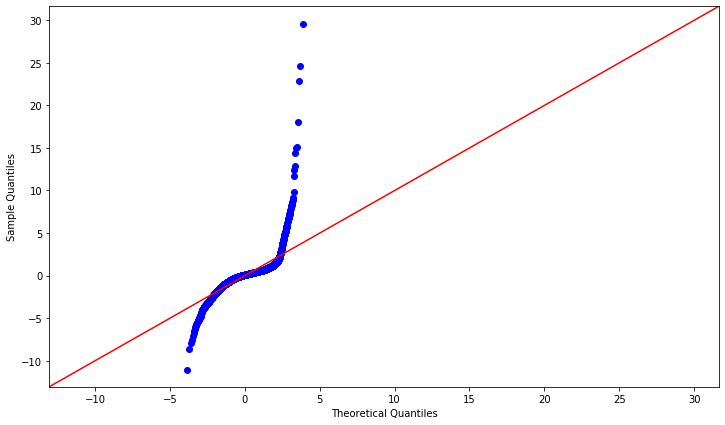

In [92]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Consequenses of ignoring NaN's 
MissingDataError: exog contains inf or nans

In [86]:
# X = data_dummies[x_cols]
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# list(zip(x_cols, vif))

In [80]:
# building model 
model_concat_dummies_drop.shape

(21597, 83)

In [81]:
# target price removed from data for training 
X = model_concat_dummies_drop.drop('price', axis= 1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198
0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,0.0,...,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0.0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# dependent variable our target price!
y = model_concat_dummies_drop.price 
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 10)

In [85]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

### Interpret